In [27]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 


In [28]:
#Se lee el dataset que usaremos
ruta = "C:/Users/becar/OneDrive/Escritorio/Mineria de Datos/BECC1927439-MineriaDeDatos/mls_salaries_masterlist.csv"
data = pd.read_csv(ruta)



df = pd.DataFrame(data) 
df

,club,last_name,first_name,position,base_salary,guaranteed_compensation,year,conference
0,Vancouver Whitecaps,Abdallah,Aminu,M,46500.0,46500.00,2013,Western
1,FC Dallas,Acosta,Kellyn,M,46500.0,70500.00,2013,Western
2,Vancouver Whitecaps,Adekugbe,Samuel,D,46500.0,51500.00,2013,Western
3,Toronto FC,Agbossoumonde,Gale,D,46500.0,53166.67,2013,Eastern
4,New England Revolution,Agudelo,Juan,F,145000.0,175000.00,2013,Eastern
...,...,...,...,...,...,...,...,...
10368,Vancouver Whitecaps,Scoaupssa e Silva,Caio Alexand,M,500000.0,562500.00,2022,Western
10369,Vancouver Whitecaps,Tceaibpesrt,Russell,M,400000.0,449375.00,2022,Western
10370,Vancouver Whitecaps,Vceaspeslinovic,Ranko,D,405000.0,490500.00,2022,Western
10371,Vancouver Whitecaps,Vcitaeps,Pedro,M,556000.0,609997.00,2022,Western


In [29]:
#Se eliminan los datos NA
df.isna().sum()
df.shape
df = df.dropna()
df.shape

(9382, 8)

In [30]:
df.head()

,club,last_name,first_name,position,base_salary,guaranteed_compensation,year,conference
0,Vancouver Whitecaps,Abdallah,Aminu,M,46500.0,46500.00,2013,Western
1,FC Dallas,Acosta,Kellyn,M,46500.0,70500.00,2013,Western
2,Vancouver Whitecaps,Adekugbe,Samuel,D,46500.0,51500.00,2013,Western
3,Toronto FC,Agbossoumonde,Gale,D,46500.0,53166.67,2013,Eastern
4,New England Revolution,Agudelo,Juan,F,145000.0,175000.00,2013,Eastern


In [31]:
df[['base_salary', 'guaranteed_compensation', 'year']].head()

,base_salary,guaranteed_compensation,year
0,46500.0,46500.00,2013
1,46500.0,70500.00,2013
2,46500.0,51500.00,2013
3,46500.0,53166.67,2013
4,145000.0,175000.00,2013


Grafica de datos en donde se comparan la relacion entre el salario base y las regalias

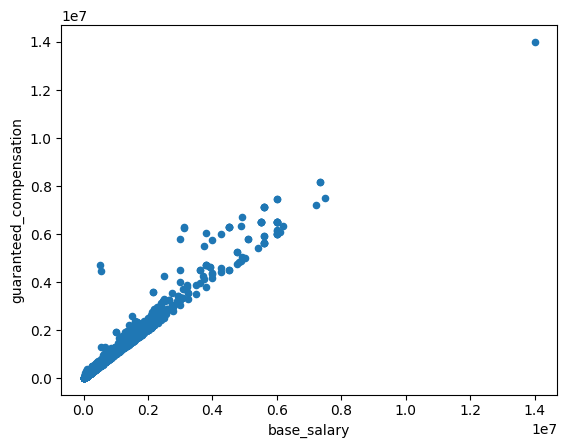

In [32]:
df.plot.scatter(x='base_salary', y='guaranteed_compensation')
plt.show()

Hacemos una linea recta sobre los datos 

In [33]:
df['base_salary'].min()

12900.0

In [34]:
#Parametros de la recta 
w = 1
b = 0

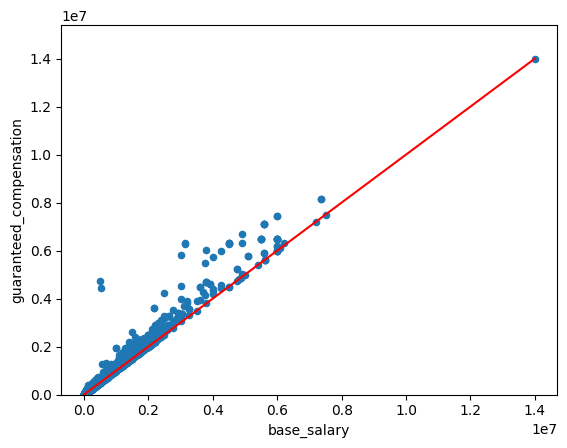

In [35]:
#Puntos en la recta 
x = np.linspace(0, df['base_salary'].max(), 100)
y = w*x+b

#Grafica 
df.plot.scatter(x='base_salary', y='guaranteed_compensation')
plt.plot(x, y, '-r')
plt.ylim(0, df['guaranteed_compensation'].max()*1.1)
#plt.grid()
plt.show()

In [36]:
#Calculo de las predicciones
df['pred'] = df['base_salary']*w+b

C:\Users\becar\AppData\Local\Temp\ipykernel_14760\3767382641.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pred'] = df['base_salary']*w+b


In [47]:
#Calculo de las funciones de error 
df['diff'] = df['pred'] - df['guaranteed_compensation']
df['cuad'] = df['diff']**2
df.head()

C:\Users\becar\AppData\Local\Temp\ipykernel_14760\570562232.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff'] = df['pred'] - df['guaranteed_compensation']
C:\Users\becar\AppData\Local\Temp\ipykernel_14760\570562232.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cuad'] = df['diff']**2


,club,last_name,first_name,position,base_salary,guaranteed_compensation,year,conference,pred,diff,cuad
0,Vancouver Whitecaps,Abdallah,Aminu,M,46500.0,46500.00,2013,Western,930000.0,883500.00,7.805722e+11
1,FC Dallas,Acosta,Kellyn,M,46500.0,70500.00,2013,Western,930000.0,859500.00,7.387402e+11
2,Vancouver Whitecaps,Adekugbe,Samuel,D,46500.0,51500.00,2013,Western,930000.0,878500.00,7.717622e+11
3,Toronto FC,Agbossoumonde,Gale,D,46500.0,53166.67,2013,Eastern,930000.0,876833.33,7.688367e+11
4,New England Revolution,Agudelo,Juan,F,145000.0,175000.00,2013,Eastern,2900000.0,2725000.00,7.425625e+12


In [40]:
df['cuad'].mean()

18908416427.832127

In [42]:
#grid de la funcion de error basado en m, b=0
w = np.linspace(5, 20, 5)
grid_error = pd.DataFrame(w, columns =['w'])
grid_error.head()

,w
0,5.00
1,8.75
2,12.50
3,16.25
4,20.00


In [43]:
def sum_error(w, df):
    b=0
    df['pred'] = df['base_salary']*w+b
    df['diff'] = df['pred']-df['guaranteed_compensation']
    df['cuad'] = df['diff']**2
    return(df['cuad'].mean())

In [44]:
grid_error['error']=grid_error['w'].apply(lambda x: sum_error(x, df=df))
grid_error.head()

C:\Users\becar\AppData\Local\Temp\ipykernel_14760\3244031571.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pred'] = df['base_salary']*w+b
C:\Users\becar\AppData\Local\Temp\ipykernel_14760\3244031571.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff'] = df['pred']-df['guaranteed_compensation']
C:\Users\becar\AppData\Local\Temp\ipykernel_14760\3244031571.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

,w,error
0,5.00,6.554246e+12
1,8.75,2.531103e+13
2,12.50,5.629031e+13
3,16.25,9.949208e+13
4,20.00,1.549163e+14


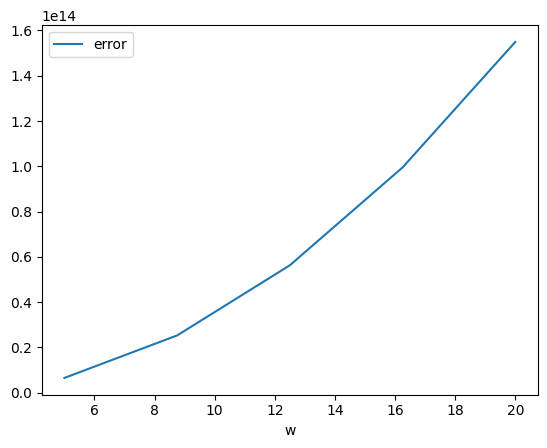

In [45]:
grid_error.plot(x='w',y='error')
plt.show()

In [48]:
# usando sklear para saber los valores optimos
from sklearn.linear_model import LinearRegression

# definiendo input y output
X_train = np.array(df['base_salary']).reshape((-1, 1))
Y_train = np.array(df['guaranteed_compensation'])

# creando modelo
model = LinearRegression(fit_intercept=False)
model.fit(X_train, Y_train)

# imprimiendo parametros
print(f"intercepto (b): {model.intercept_}")
print(f"pendiente (w): {model.coef_}")

intercepto (b): 0.0
pendiente (w): [1.12020331]
